# Heart Attack Risk Prediction

The dataset includes a wide range of features related to heart health and lifestyles. It covers individual details like age, gender, blood pressures, and BMI and also covers lifestyles choices like smoking, alcohol consumption, and sleep hours per day. The ultimate goal of this dataset and our applications is to predict the heart attack risk of a person. The features included and their respective brief details are following:
- Patient ID: Unique identifier for each patient
- Age: Age of the patient
- Sex: Gender of the patient (Male/Female)
- Cholesterol: Cholesterol levels of the patient
- Blood Pressure: Blood pressure of the patient (systolic/diastolic)
- Heart Rate: Heart rate of the patient
- Diabetes: Whether the patient has diabetes (Yes/No)
- Family History: Family history of heart-related problems (1: Yes, 0: No)
- Smoking: Smoking status of the patient (1: Smoker, 0: Non-smoker)
- Obesity: Obesity status of the patient (1: Obese, 0: Not obese)
- Alcohol Consumption: Level of alcohol consumption by the patient (None/Light/Moderate/Heavy)
- Exercise Hours Per Week: Number of exercise hours per week
- Diet: Dietary habits of the patient (Healthy/Average/Unhealthy)
- Previous Heart Problems: Previous heart problems of the patient (1: Yes, 0: No)
- Medication Use: Medication usage by the patient (1: Yes, 0: No)
- Stress Level: Stress level reported by the patient (1-10)
- Sedentary Hours Per Day: Hours of sedentary activity per day
- Income: Income level of the patient
- BMI: Body Mass Index (BMI) of the patient
- Triglycerides: Triglyceride levels of the patient
- Physical Activity Days Per Week: Days of physical activity per week
- Sleep Hours Per Day: Hours of sleep per day
- Country: Country of the patient
- Continent: Continent where the patient resides
- Hemisphere: Hemisphere where the patient resides
- Heart Attack Risk: Presence of heart attack risk (1: Yes, 0: No)

The dataset is retrieved from https://www.kaggle.com/competitions/heart-attack-risk-analysis

# Import libraries

In [77]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [78]:
print("Numpy Version:", np.__version__)
print("Pandas Version:", pd.__version__)
print("Matplotlib Version:", mpl.__version__)
print("Seaborn Version:", sns.__version__)

Numpy Version: 1.26.0
Pandas Version: 2.1.1
Matplotlib Version: 3.8.0
Seaborn Version: 0.13.0


# Import Data

In [79]:
# The data is from the competition at https://www.kaggle.com/competitions/heart-attack-risk-analysis/data?select=train.csv

data = pd.read_csv('./dataset/Heart Attack Risk Analysis.csv')

# Append Country Statistics

In [80]:
country = data[['Country']]
country

,Country
0,Argentina
1,Nigeria
2,Thailand
3,Spain
4,Germany
...,...
7005,France
7006,United Kingdom
7007,Colombia
7008,Spain


In [81]:
data = pd.read_csv('./dataset/Heart Attack Risk Analysis.csv')
coun_cardiac = pd.read_csv('./dataset/cardiovascular-disease-death-rates.csv')
coun_gdp = pd.read_csv('./dataset/GDP.csv')
coun_index = pd.read_csv('./dataset/legatum prosperity health index.csv')

In [82]:
coun_cardiac.head()

,Entity,Code,Year,Deaths - Cardiovascular diseases - Sex: Both - Age: Age-standardized (Rate)
0,Afghanistan,AFG,1990,716.27
1,Afghanistan,AFG,1991,711.20
2,Afghanistan,AFG,1992,708.28
3,Afghanistan,AFG,1993,712.87
4,Afghanistan,AFG,1994,720.74


In [83]:
coun_cardiac = coun_cardiac[coun_cardiac['Year'] == 2017]

In [84]:
coun_gdp.head()

,Country,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,24101.109430,25870.755940,26533.343900,27430.752400,28656.520210,28648.990020,28499.089430,30215.949230,...,33732.847450,35492.618490,35498.982090,37419.892820,38223.372260,38249.054870,38390.271650,39454.629830,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1637.377987,1626.764793,1806.763930,1874.765634,1897.525938,1886.692977,1896.992520,1934.636754,1955.006208,NaN
2,Angola,AGO,3089.683369,3120.356148,2908.160798,2190.768160,2195.532289,2496.199493,2794.896906,2953.342709,...,6230.297028,6346.395122,6772.528333,6980.423038,7199.245478,7096.600615,6756.935074,6650.584940,6452.355165,NaN
3,Albania,ALB,2549.473022,1909.114038,1823.307673,2057.449657,2289.873135,2665.764906,2980.066288,2717.362124,...,9628.025783,10207.752350,10526.235450,10571.010650,11259.225890,11662.030480,11868.178970,12930.140030,13364.155400,NaN
4,Arab World,ARB,6808.206995,6872.273195,7255.328362,7458.647059,7645.682856,7774.207360,8094.149842,8397.515692,...,14127.778020,14518.827450,15423.465390,15824.780110,16153.244860,16501.792590,16935.383300,17099.889390,17570.137600,NaN


In [85]:
coun_index.head()

,Unnamed: 0,country,health_index
0,0,Singapore,86.89
1,1,Japan,86.50
2,2,South Korea,84.80
3,3,"Taiwan, China",83.37
4,4,China,83.11


In [86]:
for c in country['Country'].unique():
    if c not in coun_cardiac['Entity'].unique():
        print('coun_cardiac does not have "' + c + '"')
    if c not in coun_gdp['Country '].unique():
        print('coun_gdp does not have "' + c + '"')
    if c not in coun_index['country'].unique():
        print('coun_index does not have "' + c + '"')

coun_gdp does not have "South Korea"


In [87]:
coun_gdp[coun_gdp['Country Code'] == 'KOR']

,Country,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
120,"Korea, Rep.",KOR,8273.406045,9345.822855,10044.19063,10875.12437,12008.47377,13299.16144,14433.0009,15406.22038,...,30365.27837,31228.5107,32097.164,32615.77259,33587.5834,35760.73444,37142.8329,38824.11539,40111.77576,NaN


In [88]:
coun_gdp['Country '] = coun_gdp['Country '].replace({'Korea, Rep.': 'South Korea'})

In [89]:
coun_gdp[coun_gdp['Country Code'] == 'KOR']

,Country,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
120,South Korea,KOR,8273.406045,9345.822855,10044.19063,10875.12437,12008.47377,13299.16144,14433.0009,15406.22038,...,30365.27837,31228.5107,32097.164,32615.77259,33587.5834,35760.73444,37142.8329,38824.11539,40111.77576,NaN


In [90]:
data = data.merge(coun_index[['country', 'health_index']], how='left', left_on='Country', right_on='country')

In [91]:
data = data.merge(coun_gdp[['Country ', '2018']], how='left', left_on='Country', right_on='Country ')

In [92]:
data = data.merge(coun_cardiac[['Entity', 'Deaths - Cardiovascular diseases - Sex: Both - Age: Age-standardized (Rate)']], how='left', left_on='Country', right_on='Entity')

In [93]:
data

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Country,Continent,Hemisphere,Heart Attack Risk,country,health_index,Country,2018,Entity,Deaths - Cardiovascular diseases - Sex: Both - Age: Age-standardized (Rate)
0,RDG0550,33,Male,200,129/90,48,0,1,1,1,...,Argentina,South America,Southern Hemisphere,1,Argentina,74.45,Argentina,20610.568550,Argentina,190.14
1,NMA3851,56,Female,262,159/105,46,1,0,1,0,...,Nigeria,Africa,Northern Hemisphere,1,Nigeria,50.12,Nigeria,5990.850432,Nigeria,241.54
2,TUI5807,19,Female,140,161/109,54,0,1,0,0,...,Thailand,Asia,Northern Hemisphere,0,Thailand,78.92,Thailand,19051.333380,Thailand,118.67
3,YYT5016,50,Female,163,120/62,53,0,1,1,1,...,Spain,Europe,Southern Hemisphere,1,Spain,79.66,Spain,39715.439060,Spain,106.88
4,ZAC5937,89,Female,144,153/110,92,1,0,1,0,...,Germany,Europe,Northern Hemisphere,1,Germany,81.41,Germany,53074.540120,Germany,161.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7005,BCB2291,29,Female,267,104/105,87,0,0,0,1,...,France,Europe,Northern Hemisphere,0,France,80.46,France,45342.395740,France,91.33
7006,KIG5207,83,Male,296,134/99,77,1,1,1,1,...,United Kingdom,Europe,Northern Hemisphere,0,United Kingdom,78.31,United Kingdom,45973.573500,United Kingdom,129.12
7007,GCY1316,54,Male,120,134/84,103,1,1,1,1,...,Colombia,South America,Northern Hemisphere,0,Colombia,77.78,Colombia,15012.930270,Colombia,132.62
7008,RPK2629,42,Female,147,144/76,81,0,0,1,0,...,Spain,Europe,Southern Hemisphere,1,Spain,79.66,Spain,39715.439060,Spain,106.88


In [94]:
data['Health Index'] = data['health_index']
data['GDP (2018)'] = data['2018']
data['Death Rate'] = data['Deaths - Cardiovascular diseases - Sex: Both - Age: Age-standardized (Rate)']
data.drop(['Country ', 'country', 'health_index', '2018', 'Entity', 'Deaths - Cardiovascular diseases - Sex: Both - Age: Age-standardized (Rate)'], axis=1, inplace=True)

In [95]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Health Index,GDP (2018),Death Rate
0,RDG0550,33,Male,200,129/90,48,0,1,1,1,...,63,6,7,Argentina,South America,Southern Hemisphere,1,74.45,20610.568550,190.14
1,NMA3851,56,Female,262,159/105,46,1,0,1,0,...,333,7,8,Nigeria,Africa,Northern Hemisphere,1,50.12,5990.850432,241.54
2,TUI5807,19,Female,140,161/109,54,0,1,0,0,...,537,2,10,Thailand,Asia,Northern Hemisphere,0,78.92,19051.333380,118.67
3,YYT5016,50,Female,163,120/62,53,0,1,1,1,...,591,0,9,Spain,Europe,Southern Hemisphere,1,79.66,39715.439060,106.88
4,ZAC5937,89,Female,144,153/110,92,1,0,1,0,...,145,2,5,Germany,Europe,Northern Hemisphere,1,81.41,53074.540120,161.49


In [96]:
data.to_csv('./dataset/merged 001.csv')

### Get to know the data

In [20]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Health Index,GDP (2018),Death Rate
0,RDG0550,33,Male,200,129/90,48,0,1,1,1,...,63,6,7,Argentina,South America,Southern Hemisphere,1,74.45,20610.568550,190.14
1,NMA3851,56,Female,262,159/105,46,1,0,1,0,...,333,7,8,Nigeria,Africa,Northern Hemisphere,1,50.12,5990.850432,241.54
2,TUI5807,19,Female,140,161/109,54,0,1,0,0,...,537,2,10,Thailand,Asia,Northern Hemisphere,0,78.92,19051.333380,118.67
3,YYT5016,50,Female,163,120/62,53,0,1,1,1,...,591,0,9,Spain,Europe,Southern Hemisphere,1,79.66,39715.439060,106.88
4,ZAC5937,89,Female,144,153/110,92,1,0,1,0,...,145,2,5,Germany,Europe,Northern Hemisphere,1,81.41,53074.540120,161.49


In [21]:
# Data consists of 26 features (label included) and 7010 rows

data.shape

(7010, 29)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       7010 non-null   object 
 1   Age                              7010 non-null   int64  
 2   Sex                              7010 non-null   object 
 3   Cholesterol                      7010 non-null   int64  
 4   Blood Pressure                   7010 non-null   object 
 5   Heart Rate                       7010 non-null   int64  
 6   Diabetes                         7010 non-null   int64  
 7   Family History                   7010 non-null   int64  
 8   Smoking                          7010 non-null   int64  
 9   Obesity                          7010 non-null   int64  
 10  Alcohol Consumption              7010 non-null   int64  
 11  Exercise Hours Per Week          7010 non-null   float64
 12  Diet                

In [23]:
# There is no nan in data

data.isna().sum().sum()

0

#### The number of unique value in each column

In [24]:
print(f'Unique values in each column \n{"="*50}')

for c in data.columns:
    print(f'{c}: {data[c].unique().shape[0]}')

Unique values in each column 
Patient ID: 7010
Age: 73
Sex: 2
Cholesterol: 281
Blood Pressure: 3590
Heart Rate: 71
Diabetes: 2
Family History: 2
Smoking: 2
Obesity: 2
Alcohol Consumption: 2
Exercise Hours Per Week: 7010
Diet: 3
Previous Heart Problems: 2
Medication Use: 2
Stress Level: 10
Sedentary Hours Per Day: 7010
Income: 6921
BMI: 7010
Triglycerides: 771
Physical Activity Days Per Week: 8
Sleep Hours Per Day: 7
Country: 20
Continent: 6
Hemisphere: 2
Heart Attack Risk: 2
Health Index: 20
GDP (2018): 20
Death Rate: 20


#### Categorize columns for easier encoding

This is how our data looks like. 

| Age | Sex | Cholesterol | Blood Pressure | Heart Rate | Diabetes | Family History | Smoking | Obesity | Alcohol Consu-mption | Exercise Hours Per Week | Diet | Previous Heart Problems | Medi-cation Use | Stress Level | Sedentary Hours Per Day | Income | BMI | Trigly-cerides | Physical Activity Days Per Week | Sleep Hours Per Day | Country | Continent | Hemi-sphere | Heart Attack Risk | Health Index | GDP (2018) | Death Rate |
|-----|-----|-------------|----------------|------------|----------|-----------------|---------|---------|---------------------|-------------------------|------|-------------------------|-----------------|--------------|--------------------------|--------|-----|---------------|---------------------------------|----------------------|---------|-----------|------------|-------------------|-------------------|-------------------|-------------------|
| int | binary | float | float | int | binary | binary | binary | binary | binary | float | ordinal (3) | binary | binary | ordinal (10) | float | float | float | int | int | int | cat (20) | cat(6) | binary | target (bi) | float | float | float



## EDA

### Encoding data.copy() for corr()

In [25]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Health Index,GDP (2018),Death Rate
0,RDG0550,33,Male,200,129/90,48,0,1,1,1,...,63,6,7,Argentina,South America,Southern Hemisphere,1,74.45,20610.568550,190.14
1,NMA3851,56,Female,262,159/105,46,1,0,1,0,...,333,7,8,Nigeria,Africa,Northern Hemisphere,1,50.12,5990.850432,241.54
2,TUI5807,19,Female,140,161/109,54,0,1,0,0,...,537,2,10,Thailand,Asia,Northern Hemisphere,0,78.92,19051.333380,118.67
3,YYT5016,50,Female,163,120/62,53,0,1,1,1,...,591,0,9,Spain,Europe,Southern Hemisphere,1,79.66,39715.439060,106.88
4,ZAC5937,89,Female,144,153/110,92,1,0,1,0,...,145,2,5,Germany,Europe,Northern Hemisphere,1,81.41,53074.540120,161.49


In [26]:
# Create temp object so we don't have to worry about data leakage during EDA
temp = data.copy()

# Encode Sex Hemisphere and Diet 
temp['Sex'].replace({'Male': 0, 'Female': 1}, inplace=True)
temp['Hemisphere'].replace({'Northern Hemisphere': 0, 'Southern Hemisphere': 1}, inplace=True)
temp['Diet'].replace({'Unhealthy': 0, 'Average': 1, 'Healthy':2}, inplace=True)

In [27]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

mms = MinMaxScaler()
ohe = OneHotEncoder(sparse_output=False)

# Encode Continent
encoded = pd.DataFrame(ohe.fit_transform(temp[['Continent']]), columns=ohe.get_feature_names_out(['Continent']))
temp = pd.concat([temp.drop(['Continent', 'Country', 'Patient ID'], axis=1), encoded], axis=1)

In [28]:
# Split blood pressure into two values
temp[['Systolic BP', 'Diastolic BP']] = temp['Blood Pressure'].str.split('/', expand=True).astype(int)
temp.drop('Blood Pressure', axis=1, inplace=True)

In [29]:
# Check if there is any object type column left
temp.select_dtypes(include='object').columns

Index([], dtype='object')

In [30]:
# Scale everything to better see correlation
temp = pd.DataFrame(mms.fit_transform(temp), columns=temp.columns)

In [31]:
temp.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,GDP (2018),Death Rate,Continent_Africa,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America,Systolic BP,Diastolic BP
0,0.208333,0.0,0.285714,0.114286,0.0,1.0,1.0,1.0,1.0,0.390335,...,0.257372,0.482810,0.0,0.0,0.0,0.0,0.0,1.0,0.433333,0.60
1,0.527778,1.0,0.507143,0.085714,1.0,0.0,1.0,0.0,0.0,0.864921,...,0.000000,0.702328,1.0,0.0,0.0,0.0,0.0,0.0,0.766667,0.90
2,0.013889,1.0,0.071429,0.200000,0.0,1.0,0.0,0.0,1.0,0.434723,...,0.229923,0.177578,0.0,1.0,0.0,0.0,0.0,0.0,0.788889,0.98
3,0.444444,1.0,0.153571,0.185714,0.0,1.0,1.0,1.0,1.0,0.508052,...,0.593704,0.127226,0.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.04
4,0.986111,1.0,0.085714,0.742857,1.0,0.0,1.0,0.0,1.0,0.821871,...,0.828884,0.360453,0.0,0.0,0.0,1.0,0.0,0.0,0.700000,1.00


### Correlation

In [32]:
temp.corr().loc['Heart Attack Risk'].sort_values(ascending=False, key=lambda x: abs(x))

Heart Attack Risk                  1.000000
Diabetes                           0.031538
Cholesterol                        0.020793
Systolic BP                        0.019081
Continent_North America            0.016937
Continent_Europe                  -0.016856
Sleep Hours Per Day               -0.016473
Exercise Hours Per Week            0.016020
Continent_South America            0.013976
Triglycerides                      0.013863
Previous Heart Problems            0.013482
Continent_Asia                    -0.013400
Obesity                           -0.012291
Age                                0.012095
Death Rate                        -0.012069
Income                             0.010967
Alcohol Consumption               -0.009732
Continent_Africa                   0.006191
GDP (2018)                         0.006066
Health Index                      -0.005993
Smoking                           -0.005188
Family History                    -0.005145
Continent_Australia             

From the above correlation, `Diabetes`, `Cholesterol`, `Systolic BP`, `Sleep Hours Per Day`, `Excersise Hours Per Week`, `Triglycerides`, `Previous Heart Problems`, and `Age` have the leading correlation to the target

One interesting thing is `Continent` plays a distinctive correlation with the target. It suggests residents in North America tend to have positive prone to heart attack risk while Europeans are vice versa.

Some correlation suggests a counterintuitive analysis such as `Obesity` decreases the heart attack risk.

In [33]:
# import ppscore

# ppscore.predictors(temp, 'Heart Attack Risk')

### Visualize the data distribution

<Axes: xlabel='Heart Attack Risk', ylabel='count'>

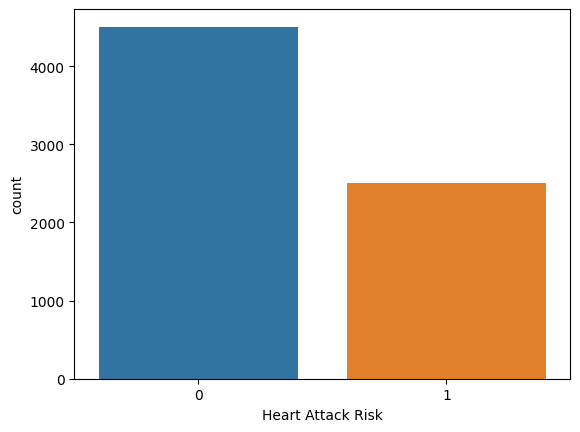

In [34]:
sns.countplot(data, x='Heart Attack Risk', hue='Heart Attack Risk', legend=False)

<Axes: xlabel='Diabetes', ylabel='count'>

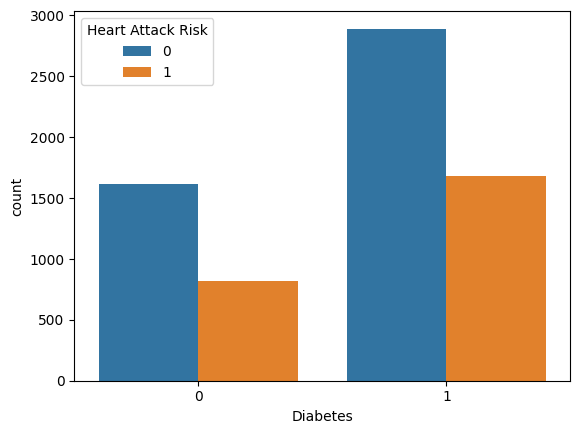

In [35]:
sns.countplot(data, x='Diabetes', hue='Heart Attack Risk') 

<Axes: xlabel='Cholesterol', ylabel='Count'>

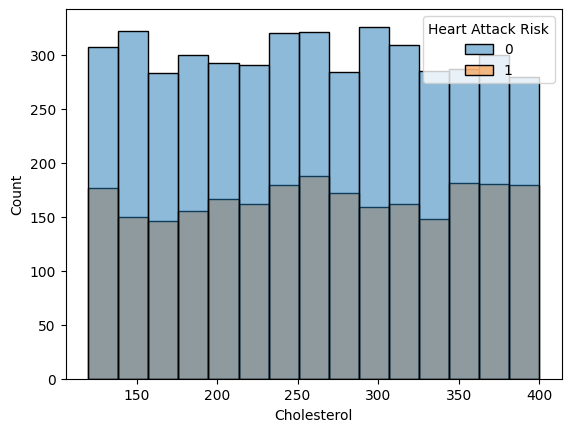

In [36]:
sns.histplot(data, x='Cholesterol', hue='Heart Attack Risk', bins=15) 

<Axes: xlabel='Systolic BP', ylabel='Count'>

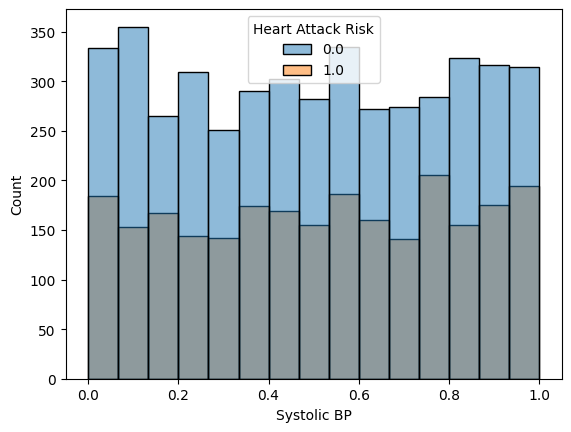

In [37]:
sns.histplot(temp, x='Systolic BP', hue='Heart Attack Risk', bins=15) 

<Axes: xlabel='Sleep Hours Per Day', ylabel='count'>

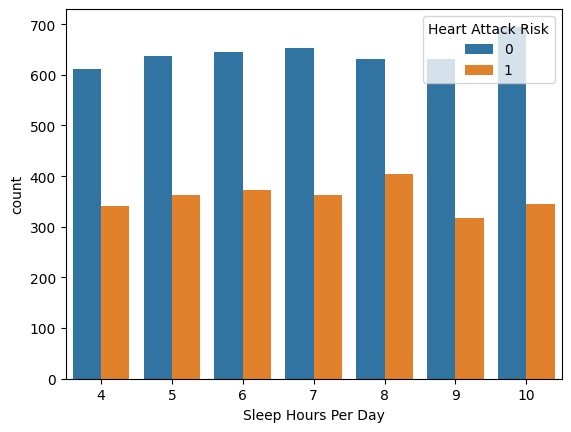

In [38]:
sns.countplot(data, x='Sleep Hours Per Day', hue='Heart Attack Risk') 

<Axes: xlabel='Exercise Hours Per Week', ylabel='Count'>

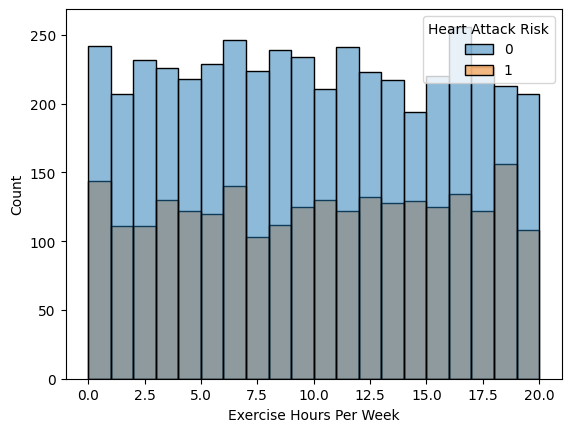

In [39]:
sns.histplot(data, x='Exercise Hours Per Week', hue='Heart Attack Risk') 

<Axes: xlabel='Triglycerides', ylabel='Count'>

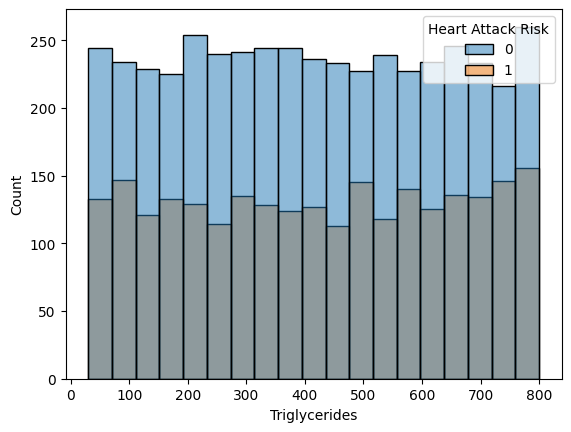

In [40]:
sns.histplot(data, x='Triglycerides', hue='Heart Attack Risk') 

<Axes: xlabel='Previous Heart Problems', ylabel='count'>

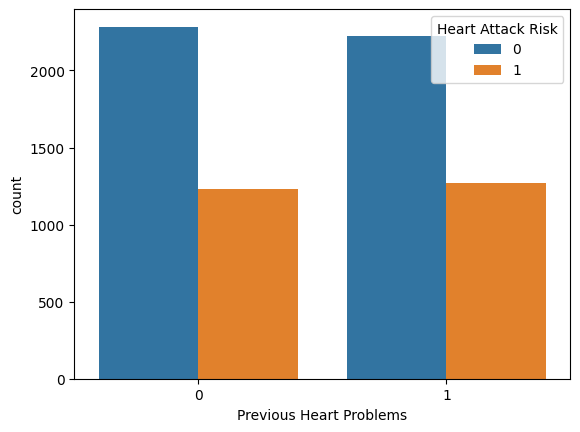

In [41]:
sns.countplot(data, x='Previous Heart Problems', hue='Heart Attack Risk') 

<Axes: xlabel='Age', ylabel='Count'>

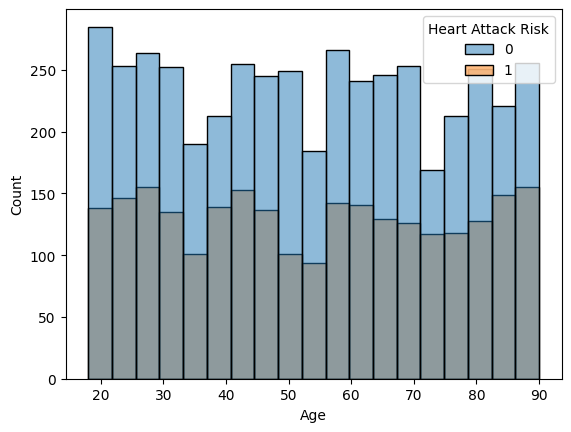

In [42]:
sns.histplot(data, x='Age', hue='Heart Attack Risk') 

<Axes: xlabel='Continent', ylabel='count'>

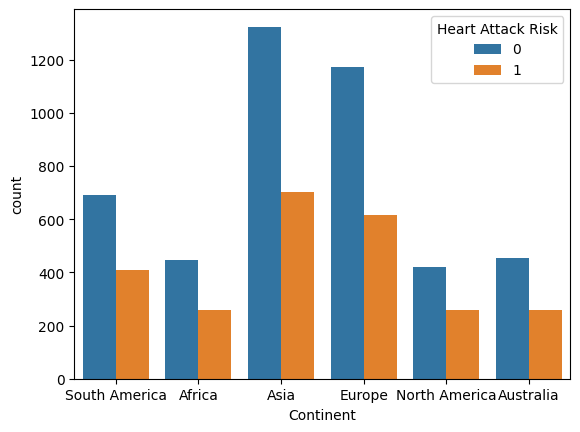

In [43]:
sns.countplot(data, x='Continent', hue='Heart Attack Risk') 

<Axes: xlabel='GDP (2018)', ylabel='Count'>

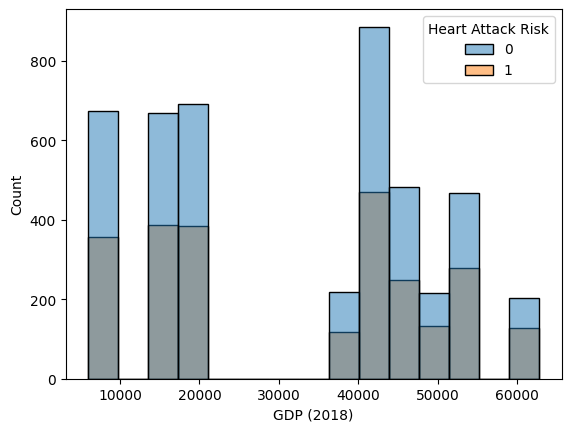

In [44]:
sns.histplot(data, x='GDP (2018)', hue='Heart Attack Risk', bins=15) 

<Axes: xlabel='Health Index', ylabel='Count'>

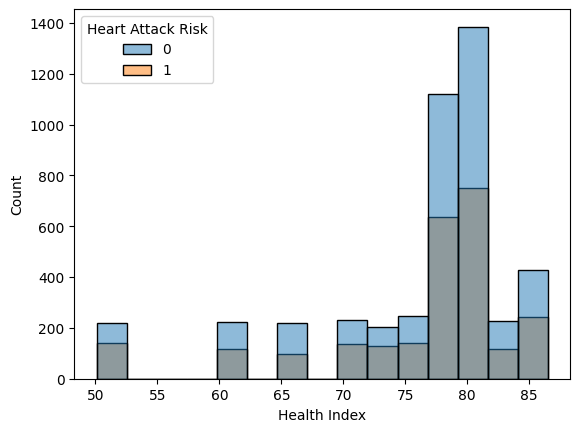

In [45]:
sns.histplot(data, x='Health Index', hue='Heart Attack Risk', bins=15) 

The dataset target classes are imbalanced.

Ever so slightly, a person falls into any of the following categories has a higher heart attack risk
- Have diabetes
- Have high cholesterol
- Have 8 hours of sleep per day
- Have 18-19 hours of exercise hours per week
- Have age of 71-75 years old 
- Have origin from North America or Australia.
- Have origin from high GDP country

Below is pairplot which shows no noticeable correlation of scatterplot between any two features and the target.

In [46]:
# plt.figure(figsize=(20,20))
# sns.pairplot(temp, hue='Heart Attack Risk')

# Train Test Split

In [47]:
# Encode some very well known feature to binary or ordinal data
data['Sex'] = data['Sex'].map({'Male': 0, 'Female':1})
data['Diet'] = data['Diet'].map({'Unhealthy': 0, 'Average':1, 'Healthy':2})
data['Hemisphere'] = data['Hemisphere'].map({'Northern Hemisphere': 0, 'Southern Hemisphere': 1})

# Split blood pressure into two values
data[['Systolic BP', 'Diastolic BP']] = data['Blood Pressure'].str.split('/', expand=True).astype(int)
data.drop('Blood Pressure', axis=1, inplace=True)

In [48]:
X = data.drop('Heart Attack Risk', axis = 1)
y = data['Heart Attack Risk']

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode and Scale Features

In [50]:
# Use ColumnTransformer to encode the training set

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

mms = MinMaxScaler()
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

col_num = X_train.select_dtypes(exclude='object').columns.tolist()
col_str = X_train.select_dtypes(include='object').columns.tolist()

transformer = ColumnTransformer([('MinMaxScaler', mms, col_num),
                                 ('OneHotEncoding', ohe, col_str)])

In [51]:
X_train = transformer.fit_transform(X_train)

In [73]:
X_test = transformer.transform(X_test)

# Model Training

<Axes: xlabel='Heart Attack Risk', ylabel='count'>

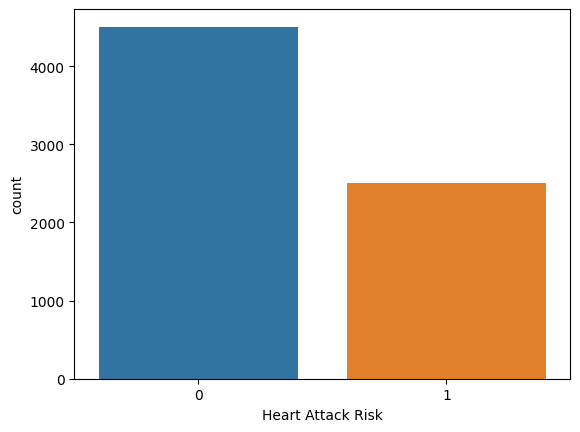

In [52]:
# Quick reminder that we have unbalanced target classes
sns.countplot(data, x='Heart Attack Risk', hue='Heart Attack Risk', legend=False)

## Data Undersampling

In [53]:
# Perform undersampling with imblearn

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)

## GridSearch

In [54]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [55]:
classifiers = {
    'RandomForest': (RandomForestClassifier(), {
        'n_estimators': [100, 300, 500],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'max_features': ['sqrt']
    }),
    'XGBoost': (XGBClassifier(), {
        'n_estimators': [100, 300, 500],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1],
        'subsample': [0.7, 0.9]
    }),
    'LogisticRegression': (LogisticRegression(), {
        'C': [0.1, 1.0, 10.0],
        'penalty': ['elasticnet'],
        'solver': ['saga'],
        'l1_ratio': [0.5, 0.8, 1]
    }),
    'LightGBM': (LGBMClassifier(verbose=-1), {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5, 7]
    }),
    'CatBoost': (CatBoostClassifier(verbose=0), {
        'iterations': [100, 200, 300],
        'learning_rate': [0.05, 0.1],
        'depth': [4, 6, 8]
    })
}

In [74]:
import pickle

best_classifiers_grid = {}
scorer = make_scorer(f1_score) 
# We choose f1_score because we prioritize predicting positive over negative
# We want to raise awareness of possibility for heart attack risk

print('Best Classifier and Parameters')
print('='*50)

for name, (classifier, param_grid) in classifiers.items():
    grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring=scorer, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Print the best parameters and the corresponding score
    print(f'{name}: {grid_search.best_params_}')
    print(f'Cross val f1 score of {name}: {grid_search.cv_results_["mean_test_score"][0]:.4f}')
    print(f'Test set f1 score of {name}: {f1_score(y_test, grid_search.predict(X_test)):.4f}')
    print('—'*35)
    
    # Save the best classifier in the dictionary
    best_classifiers_grid[name] = grid_search.best_estimator_
    pickle.dump(grid_search, open(f'./model/{name}.pkl', 'wb'))

Best Classifier and Parameters


RandomForest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Cross val f1 score of RandomForest: 0.4780
Test set f1 score of RandomForest: 0.4059
———————————————————————————————————
XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.9}
Cross val f1 score of XGBoost: 0.4643
Test set f1 score of XGBoost: 0.4324
———————————————————————————————————
LogisticRegression: {'C': 10.0, 'l1_ratio': 0.8, 'penalty': 'elasticnet', 'solver': 'saga'}
Cross val f1 score of LogisticRegression: 0.4727
Test set f1 score of LogisticRegression: 0.4382
———————————————————————————————————
LightGBM: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Cross val f1 score of LightGBM: 0.4908
Test set f1 score of LightGBM: 0.4242
———————————————————————————————————
CatBoost: {'depth': 6, 'iterations': 200, 'learning_rate': 0.1}
Cross val f1 score of CatBoost: 0.4954
Test set f1 score of CatBoost: 0.4310
———————————————————————————————

In [ ]:
# Best Classifier and Parameters
# ==================================================
# RandomForest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
# Cross val f1 score of RandomForest: 0.4780
# Test set f1 score of RandomForest: 0.4059
# ———————————————————————————————————
# XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.9}
# Cross val f1 score of XGBoost: 0.4643
# Test set f1 score of XGBoost: 0.4324
# ———————————————————————————————————
# LogisticRegression: {'C': 10.0, 'l1_ratio': 0.8, 'penalty': 'elasticnet', 'solver': 'saga'}
# Cross val f1 score of LogisticRegression: 0.4727
# Test set f1 score of LogisticRegression: 0.4382
# ———————————————————————————————————
# LightGBM: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
# Cross val f1 score of LightGBM: 0.4908
# Test set f1 score of LightGBM: 0.4242
# ———————————————————————————————————
# CatBoost: {'depth': 6, 'iterations': 200, 'learning_rate': 0.1}
# Cross val f1 score of CatBoost: 0.4954
# Test set f1 score of CatBoost: 0.4310
# ———————————————————————————————————

## Ensemble Models

In [75]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

# Define base models
base_models = []
for k, v in best_classifiers_grid.items():
    base_models.append((k, v))

In [ ]:
meta_model = LogisticRegression()
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacking_classifier.fit(X_train, y_train)
yhat_train_stacking = stacking_classifier.predict(X_train)
print(f'Training f1 score of Stacking: {f1_score(y_train, yhat_train_stacking)}')
yhat_test_stacking = stacking_classifier.predict(X_test)
print(f'Training f1 score of Stacking: {f1_score(y_test, yhat_test_stacking)}')

In [ ]:
voting_classifier = VotingClassifier(estimators=base_models, voting='soft')
voting_classifier.fit(X_train, y_train)
yhat_train_voting = voting_classifier.predict(X_train)
print(f'Training f1 score of Voting: {f1_score(y_train, yhat_train_voting)}')
yhat_test_voting = voting_classifier.predict(X_test)
print(f'Training f1 score of Voting: {f1_score(y_test, yhat_test_voting)}')

In [ ]:
pickle.dump(stacking_classifier, open('./model/stacking_classifier.pkl', 'wb'))
pickle.dump(voting_classifier, open('./model/voting_classifier.pkl', 'wb'))

# Modeling with Selective Features

In [99]:
# Import the premerged data and encode some well known features
data2 = pd.read_csv('./dataset/merged 001.csv')
data2['Sex'].replace({'Male': 0, 'Female': 1}, inplace=True)
data2['Hemisphere'].replace({'Northern Hemisphere': 0, 'Southern Hemisphere': 1}, inplace=True)
data2['Diet'].replace({'Unhealthy': 0, 'Average': 1, 'Healthy':2}, inplace=True)
data2[['Systolic BP', 'Diastolic BP']] = data2['Blood Pressure'].str.split('/', expand=True).astype(int)
data2.drop('Blood Pressure', axis=1, inplace=True)

In [101]:
# Select only the top correlated features
data2 = data2[['Heart Attack Risk','Diabetes', 'Cholesterol', 'Systolic BP', 'Continent', 'Sleep Hours Per Day',
              'Exercise Hours Per Week', 'Triglycerides', 'Previous Heart Problems', 'Obesity', 'Age', 
              'Death Rate', 'Alcohol Consumption']]

## Train Test Split

In [102]:
X = data2.drop('Heart Attack Risk', axis = 1)
y = data2['Heart Attack Risk']

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Encode and Scale Features

In [104]:
# Use ColumnTransformer to encode the training set

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

mms = MinMaxScaler()
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

col_num = X_train.select_dtypes(exclude='object').columns.tolist()
col_str = X_train.select_dtypes(include='object').columns.tolist()

transformer = ColumnTransformer([('MinMaxScaler', mms, col_num),
                                 ('OneHotEncoding', ohe, col_str)])

X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

## Model Training

In [105]:
# Perform undersampling with imblearn

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)

In [106]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [107]:
classifiers = {
    'RandomForest': (RandomForestClassifier(), {
        'n_estimators': [100, 300, 500],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'max_features': ['sqrt']
    }),
    'XGBoost': (XGBClassifier(), {
        'n_estimators': [100, 300, 500],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1],
        'subsample': [0.7, 0.9]
    }),
    'LogisticRegression': (LogisticRegression(), {
        'C': [0.1, 1.0, 10.0],
        'penalty': ['elasticnet'],
        'solver': ['saga'],
        'l1_ratio': [0.5, 0.8, 1]
    }),
    'LightGBM': (LGBMClassifier(verbose=-1), {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5, 7]
    }),
    'CatBoost': (CatBoostClassifier(verbose=0), {
        'iterations': [100, 200, 300],
        'learning_rate': [0.05, 0.1],
        'depth': [4, 6, 8]
    })
}

In [116]:
import pickle

best_classifiers_grid = {}
scorer = make_scorer(f1_score) 
# We choose f1_score because we prioritize predicting positive over negative
# We want to raise awareness of possibility for heart attack risk

print('Best Classifier and Parameters')
print('='*50)

for name, (classifier, param_grid) in classifiers.items():
    grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring=scorer, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Print the best parameters and the corresponding score
    print(f'{name}: {grid_search.best_params_}')
    print(f'Cross val f1 score of {name}: {grid_search.cv_results_["mean_test_score"][0]:.4f}')
    print(f'Test set f1 score of {name}: {f1_score(y_test, grid_search.predict(X_test)):.4f}')
    print('—'*35)
    
    # Save the best classifier in the dictionary
    best_classifiers_grid[name] = grid_search.best_estimator_
    pickle.dump(grid_search, open(f'./model2/{name}.pkl', 'wb'))

Best Classifier and Parameters


RandomForest: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100}
Cross val f1 score of RandomForest: 0.4798
Test set f1 score of RandomForest: 0.4623
———————————————————————————————————
XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.7}
Cross val f1 score of XGBoost: 0.4679
Test set f1 score of XGBoost: 0.4320
———————————————————————————————————
LogisticRegression: {'C': 10.0, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}
Cross val f1 score of LogisticRegression: 0.4724
Test set f1 score of LogisticRegression: 0.4228
———————————————————————————————————
LightGBM: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Cross val f1 score of LightGBM: 0.4881
Test set f1 score of LightGBM: 0.4316
———————————————————————————————————
CatBoost: {'depth': 6, 'iterations': 200, 'learning_rate': 0.1}
Cross val f1 score of CatBoost: 0.4731
Test set f1 score of CatBoost: 0.4315
———————————————————————————————

### Ensemble Models

In [129]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

# Define base models
base_models = []
for k, v in best_classifiers_grid.items():
    base_models.append((k, v))

In [130]:
meta_model = LogisticRegression()
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
stacking_classifier.fit(X_train, y_train)
yhat_train_stacking = stacking_classifier.predict(X_train)
print(f'Training f1 score of Stacking: {f1_score(y_train, yhat_train_stacking)}')
yhat_test_stacking = stacking_classifier.predict(X_test)
print(f'Testing f1 score of Stacking: {f1_score(y_test, yhat_test_stacking)}')

Training f1 score of Stacking: 0.34657398212512414
Testing f1 score of Stacking: 0.4064625850340136


In [131]:
# Save the model
pickle.dump(stacking_classifier, open('./model2/stacking_classifier.pkl', 'wb'))

In [139]:
voting_classifier = VotingClassifier(estimators=base_models, voting='hard', weights=None)
voting_classifier.fit(X_train, y_train)
yhat_train_voting = voting_classifier.predict(X_train)
print(f'Training f1 score of Voting: {f1_score(y_train, yhat_train_voting)}')
yhat_test_voting = voting_classifier.predict(X_test)
print(f'Testing f1 score of Voting: {f1_score(y_test, yhat_test_voting)}')

Training f1 score of Voting: 0.7723114956736712
Testing f1 score of Voting: 0.43775427176566317


In [140]:
# Save the model
pickle.dump(voting_classifier, open('./model2/voting_classifier.pkl', 'wb'))

## --

In [144]:
best_model = best_classifiers_grid['RandomForest']
best_model

RandomForestClassifier(max_depth=5, min_samples_split=10)

Text(50.722222222222214, 0.5, 'True')

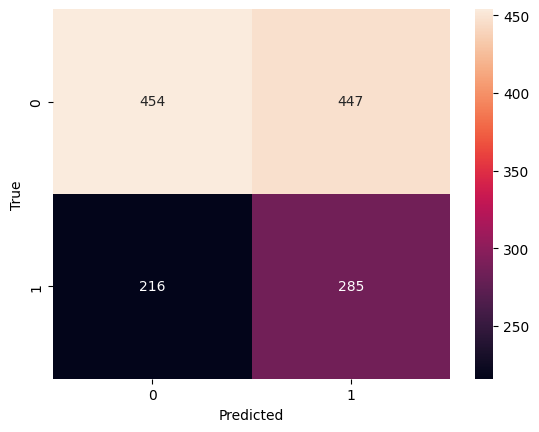

In [145]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, best_model.predict(X_test)), annot=True, fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('True')